APPLICATION OF PANDAS AND VISUALISATION LIBRARY ON FINANCIAL DATA

In [10]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import plotly
import cufflinks as cf
cf.go_offline()

%matplotlib inline

import yfinance as yf
yf.pdr_override()

In [11]:
# get stock information from yahoo finance
# from Bank of America (BAC), CitiGroup (C), Goldman Sachs (GS), JPMorgan Chase (JPM), 
#              Morgan Stanley (MS), Wells Fargo (WFC) 
# define the start date and end date of the stock info

start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

In [12]:
BAC = data.get_data_yahoo('BAC', start, end)
C = data.get_data_yahoo('C', start, end)
GS = data.get_data_yahoo('GS', start, end)
JPM = data.get_data_yahoo('JPM', start, end)
MS = data.get_data_yahoo('MS', start, end)
WFC = data.get_data_yahoo('WFC', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [14]:
# concatenate all banks data and set the 'tickers' as keys

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  33.170311  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.818043  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.860325  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.810989  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.832130  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  34.886639  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  34.910564  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  35.006313  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  35.042198  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  35.413132  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.975798  11016400  
2006-01-04  31.530001  19.744101  10870000  
2006-01-05  31.495001  19.722191  10158000  
2006-01-06  31.680000  19.838034   8403800  
2006-01-09  31.674999  19.834906   5619600  

[5 rows x 36 columns]

In [15]:
# set the column names

bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  33.170311  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.818043  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.860325  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.810989  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.832130  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.886639  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.910564  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  35.006313  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  35.042198  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.413132  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.975798  11016400  
2006-01-04   31.530001  19.744101  10870000  
2006-01-05   31.495001  19.722191  10158000  
2006-01-06   31.680000  19.838034   8403800  
2006-01-09   31.674999  19.834906   5619600  

[5 rows x 36 columns]

Exploratory Data Analysis

In [16]:
# max Close price for each bank throughout the time period

bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [17]:
# create returns dataframe
# this dataframe will contain the return value for each bank's stock

returns = pd.DataFrame()

In [18]:
for tick in tickers :
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


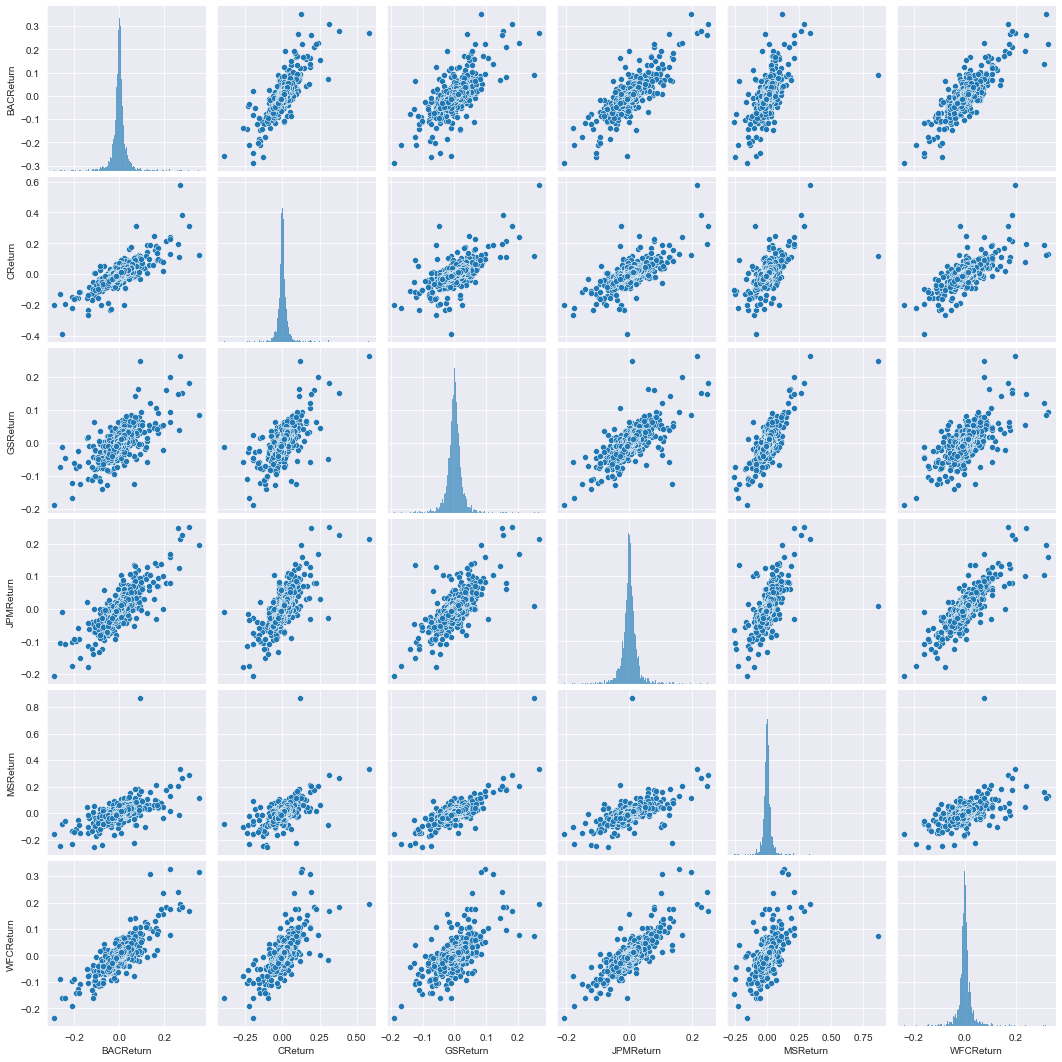

In [19]:
# pairplot of returns dataframe
# from the pairplot, we can see mostly has normal distribution

sns.pairplot(returns[1:])

In [20]:
# date of worst stock's return for each bank
# from below output, we can see that BAC, GS, JPM and WFC share the same date
# if we google up 2009-01-20, it is the first day of inauguration of Barack Obama
# it may be coincidence or not

returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [21]:
# date of best stock's return for each bank

returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [22]:
# standard deviation of the return
# from below output, we can say that the stability of all banks is quite the same
# but among all, C is the highest risk and GS is the lowest risk throughout the entire time period

returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [23]:
# let's focus on 2015 data 
# standard deviation of the returns in 2015
# from below output, we can say that the stability of all banks is quite the same
# but among all, MS is the highest risk and WFC is the lowest risk in 2015

returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

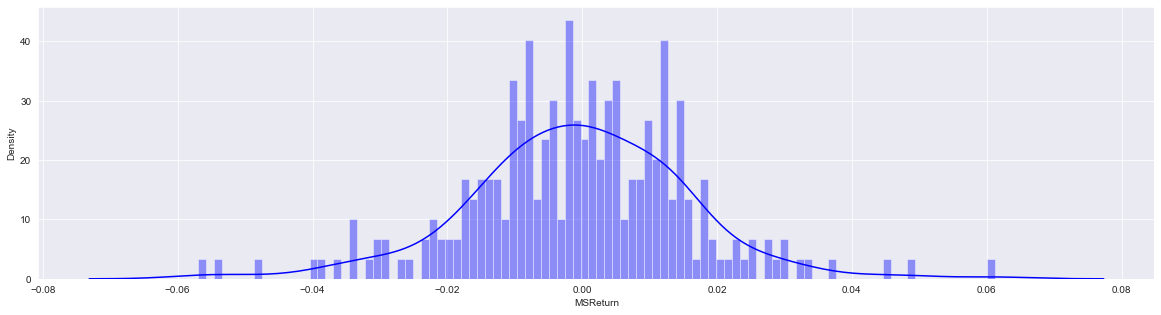

In [36]:
# distribution plot of Morgan Stanley in 2015
# from below plot, we can see that the MS return is quite stable (deviate only ~0.06 from the average)

plt.figure(figsize=(20,5))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'], color='blue', bins=100)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='CReturn', ylabel='Density'>

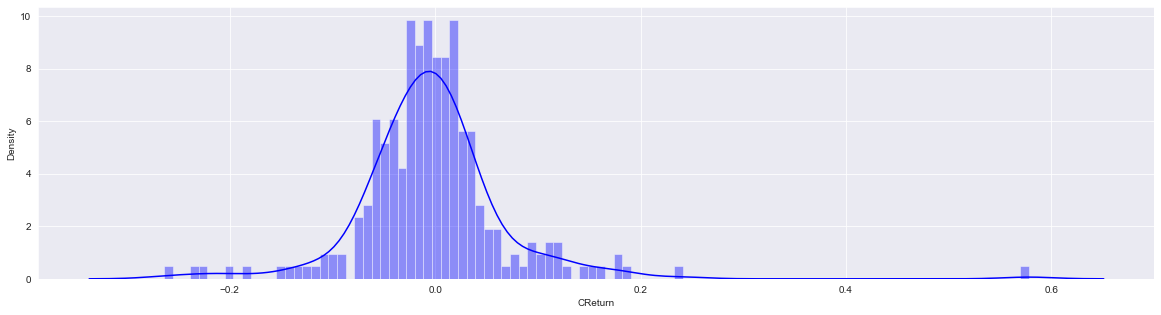

In [38]:
# distribution plot of CitiGroup in 2008
# from distplot below, we can see that the standard deviation is quite stretch out, deviate ~0.6
# seems like there is an outlier

plt.figure(figsize=(20,5))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'], color='blue', bins=100)

<AxesSubplot:xlabel='Date'>

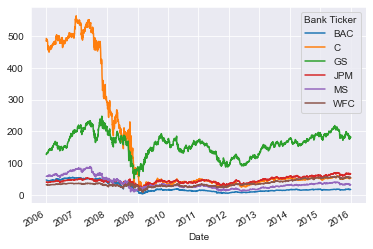

In [45]:
# plot of Close price of all banks in entire time period

bank_stocks.xs(level='Stock Info', key='Close', axis=1).plot()

In [27]:
# OR, plot using interactive plotting for a better experience
# we can see there is drop in above & below plot in 2008 due to the global financial crisis

bank_stocks.xs(level='Stock Info', key='Close', axis=1).iplot()

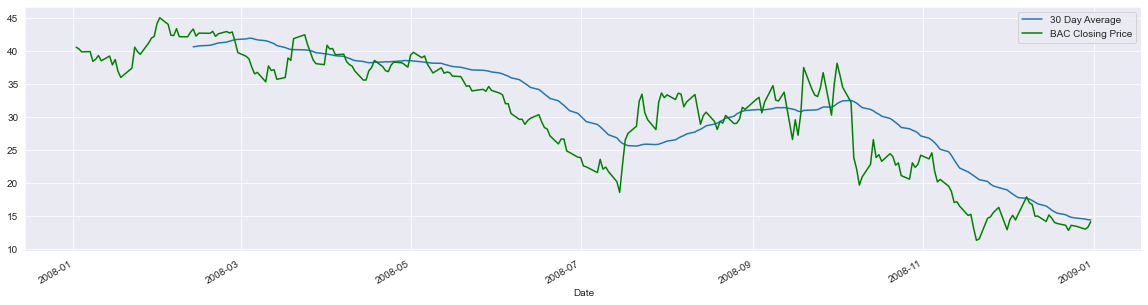

In [48]:
# Moving Averages
# plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

plt.figure(figsize=(20,5))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(30).mean().plot(label='30 Day Average')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(color='Green',label='BAC Closing Price')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

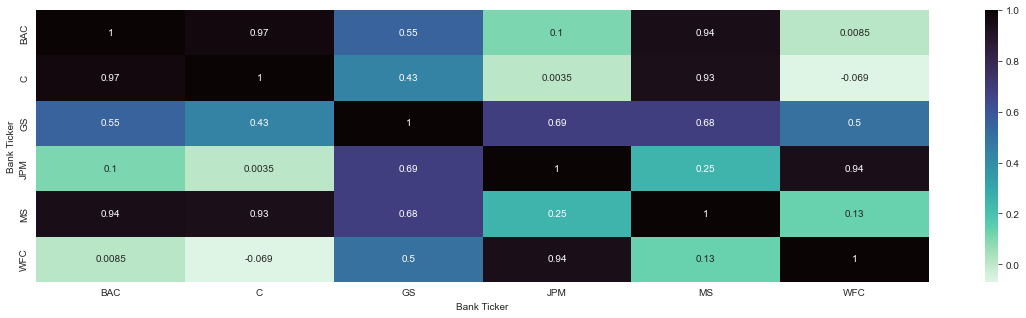

In [51]:
# plotting the correlation of the stocks close price
# from below heatmap, we can say that closing price for BAC&C, BAC&MS, C&MS, JPM&WFC is highly correlated

plt.figure(figsize=(20,5))
sns.heatmap(bank_stocks.xs(level='Stock Info', key='Close', axis=1).corr(), annot=True, cmap='mako_r')

In [30]:
# OR PLOT INTERACTIVELY USING PLOTLY 

bank_stocks.xs(level='Stock Info', key='Close', axis=1).corr().iplot(kind='heatmap', colorscale='YlGnBu')

<Figure size 1440x360 with 0 Axes>

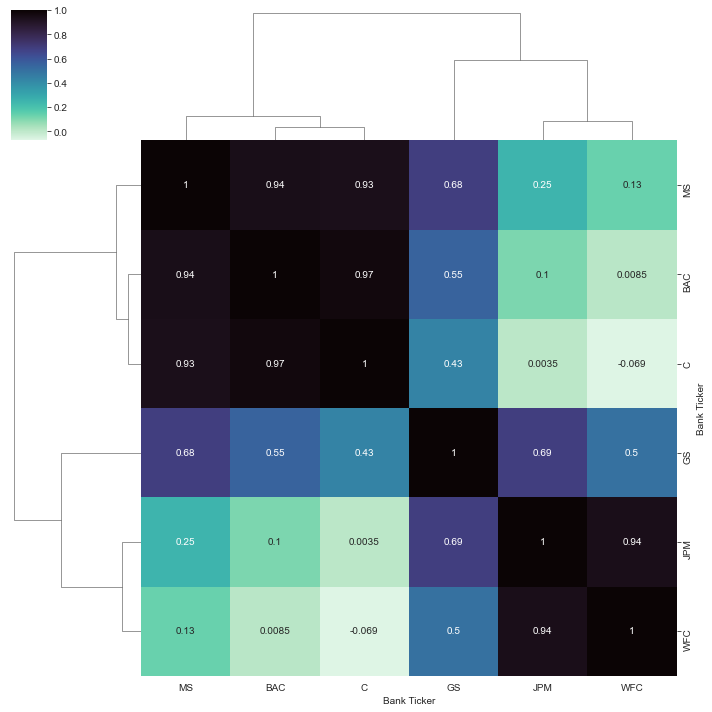

In [52]:
# plotting the correlation of the stocks close price
# from below plot, we can see that, MS, BAC & C are correlated with each other and JPM & WFC in another cluster of correlation

plt.figure(figsize=(20,5))
sns.clustermap(bank_stocks.xs(level='Stock Info', key='Close', axis=1).corr(), annot=True, cmap='mako_r')

In [32]:
# create candle plot for Bank of America (BAC) in 2015

bank_stocks['BAC'].loc['2015-01-01':'2015-12-31'].iplot(kind='candle')

In [33]:
# Simple Moving Average of Morgan Stanley (MS) in 2015

bank_stocks['MS']['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma', periods=[13,21,55], title='Simple Moving Averages')

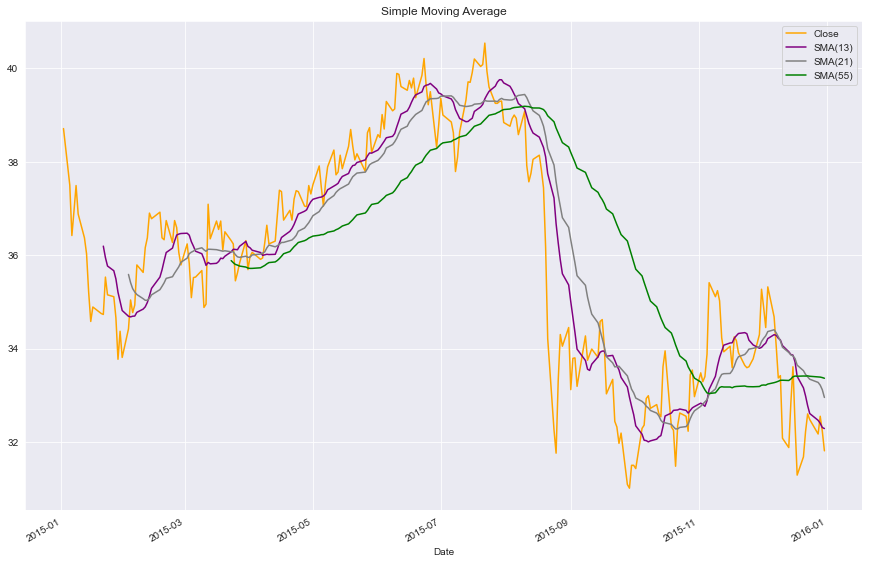

In [34]:
# OR USING NORMAL PLOTTING (not interactive)

plt.figure(figsize=(15,10))
bank_stocks['MS']['Close'].loc['2015-01-01':'2015-12-31'].plot(color='Orange')
bank_stocks['MS']['Close'].loc['2015-01-01':'2015-12-31'].rolling(13).mean().plot(color='Purple', label='SMA(13)')
bank_stocks['MS']['Close'].loc['2015-01-01':'2015-12-31'].rolling(21).mean().plot(color='Grey', label='SMA(21)')
bank_stocks['MS']['Close'].loc['2015-01-01':'2015-12-31'].rolling(55).mean().plot(color='Green', label='SMA(55)')
plt.title('Simple Moving Average')
plt.legend()